# 1. Install Dependencies and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
!pip install tensorflow

In [54]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [55]:
import tensorflow as tf
import os

In [56]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [57]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [58]:
import cv2
import imghdr

In [59]:
%pwd

'/content/drive/MyDrive/Image classifier Happy vs Sad (1)'

In [60]:
%cd "/content/drive/MyDrive/Image classifier Happy vs Sad (1)"

/content/drive/MyDrive/Image classifier Happy vs Sad (1)


In [ ]:
data_dir = 'data (1)'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = tf.keras.utils.image_dataset_from_directory('data (1)')

Found 5365 files belonging to 2 classes.


In [63]:
data_iterator = data.as_numpy_iterator()

In [64]:
batch = data_iterator.next()

In [65]:
len(batch)

2

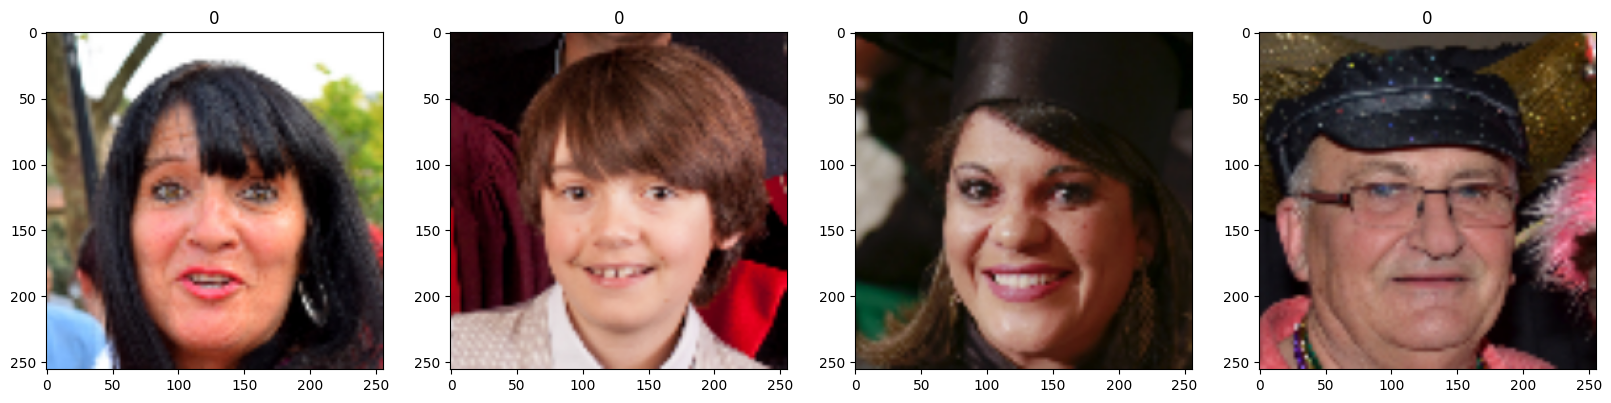

In [66]:
fig, ax = plt.subplots(ncols=4,figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [67]:
data = data.map(lambda x, y: (x/255,y))

In [68]:
data.as_numpy_iterator().next()

(array([[[[0.43529412, 0.40784314, 0.4745098 ],
          [0.4406863 , 0.4139706 , 0.47990197],
          [0.4730392 , 0.4507353 , 0.5122549 ],
          ...,
          [0.59338236, 0.4122549 , 0.30367646],
          [0.5889706 , 0.4151961 , 0.3022059 ],
          [0.5882353 , 0.41568628, 0.3019608 ]],
 
         [[0.42818627, 0.40318626, 0.46029413],
          [0.43295038, 0.40859374, 0.46501225],
          [0.46153492, 0.4410386 , 0.4933211 ],
          ...,
          [0.59159005, 0.4107843 , 0.3032935 ],
          [0.587454  , 0.4137255 , 0.301731  ],
          [0.5867647 , 0.41421568, 0.30147058]],
 
         [[0.3855392 , 0.3752451 , 0.375     ],
          [0.38653493, 0.37633273, 0.375674  ],
          [0.3925092 , 0.38285846, 0.37971812],
          ...,
          [0.5808364 , 0.4019608 , 0.3009957 ],
          [0.5783548 , 0.40490195, 0.29888174],
          [0.5779412 , 0.40539217, 0.29852942]],
 
         ...,
 
         [[0.4627451 , 0.46372548, 0.35441175],
          [0.46493

# 5. Split Data

In [69]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [70]:
train_size

117

In [71]:
len(data)

168

In [72]:
118+16+33

167

In [73]:
test_size

17

In [74]:
val_size

34

In [75]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building Deep Learning Model

In [76]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [78]:
model = Sequential()

In [79]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [82]:
logdir = 'logs (1)'

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [84]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
117/117 [==============================] - 41s 326ms/step - loss: 0.0952 - accuracy: 0.9773 - val_loss: 0.0406 - val_accuracy: 0.9825
Epoch 2/20
117/117 [==============================] - 38s 316ms/step - loss: 0.0545 - accuracy: 0.9778 - val_loss: 0.0483 - val_accuracy: 0.9835
Epoch 3/20
117/117 [==============================] - 38s 318ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0292 - val_accuracy: 0.9890
Epoch 4/20
117/117 [==============================] - 38s 323ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0457 - val_accuracy: 0.9908
Epoch 5/20
117/117 [==============================] - 36s 299ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0357 - val_accuracy: 0.9926
Epoch 6/20
117/117 [==============================] - 39s 328ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0462 - val_accuracy: 0.9890
Epoch 7/20
117/117 [==============================] - 37s 308ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0490 - val_ac

# 8. Plot Performance

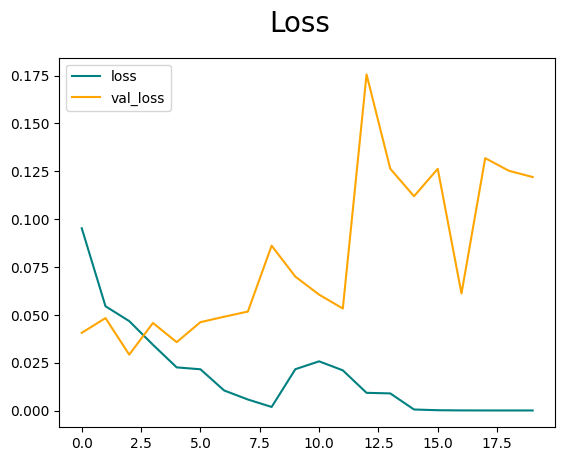

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

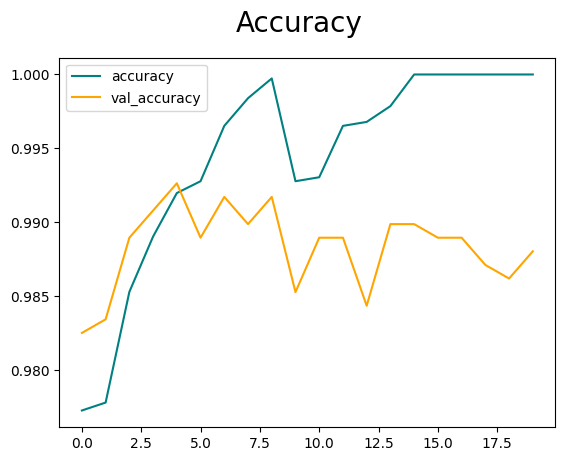

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [89]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 78ms/step


In [90]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6666667, shape=(), dtype=float32) tf.Tensor(0.46153846, shape=(), dtype=float32) tf.Tensor(0.98123825, shape=(), dtype=float32)


# 10. Test

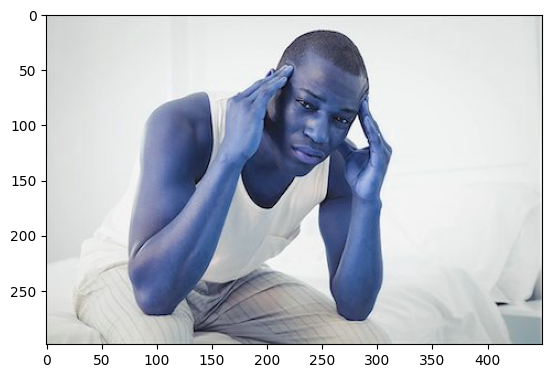

In [91]:
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()

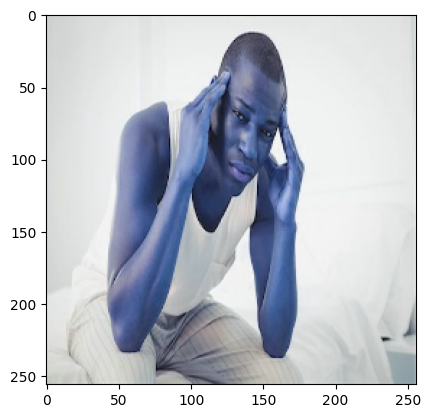

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [94]:
yhat

array([[0.9991516]], dtype=float32)

In [95]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [96]:
from tensorflow.keras.models import load_model

In [97]:
model.save(os.path.join('models','imageclassifiers1s.h5'))

In [98]:
new_model = load_model(os.path.join('models','imageclassifiers1s.h5'))

In [99]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


In [100]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
